# sklearn-LDA

代码示例：https://mp.weixin.qq.com/s/hMcJtB3Lss1NBalXRTGZlQ （玉树芝兰） <br>
可视化：https://blog.csdn.net/qq_39496504/article/details/107125284  <br>
sklearn lda参数解读:https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.LatentDirichletAllocation.html
<br>中文版参数解读：https://blog.csdn.net/TiffanyRabbit/article/details/76445909
<br>LDA原理-视频版：https://www.bilibili.com/video/BV1t54y127U8
<br>LDA原理-文字版：https://www.jianshu.com/p/5c510694c07e
<br>score的计算方法：https://github.com/scikit-learn/scikit-learn/blob/844b4be24d20fc42cc13b957374c718956a0db39/sklearn/decomposition/_lda.py#L729
<br>主题困惑度1：https://blog.csdn.net/weixin_43343486/article/details/109255165
<br>主题困惑度2：https://blog.csdn.net/weixin_39676021/article/details/112187210

## 1.预处理

In [4]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [13]:
import os
import pandas as pd
import re
import jieba
import jieba.posseg as psg

In [2]:
pip install --upgrade bottleneck

     ---------------------------------------- 0.0/109.9 kB ? eta -:--:--
     ------ ------------------------------ 20.5/109.9 kB 640.0 kB/s eta 0:00:01
     --------------------------- --------- 81.9/109.9 kB 907.3 kB/s eta 0:00:01
     --------------------------- --------- 81.9/109.9 kB 907.3 kB/s eta 0:00:01
     ------------------------------------ 109.9/109.9 kB 634.7 kB/s eta 0:00:00
  Attempting uninstall: bottleneck
    Found existing installation: Bottleneck 1.3.5
    Uninstalling Bottleneck-1.3.5:
      Successfully uninstalled Bottleneck-1.3.5
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install --upgrade openpyxl

     ---------------------------------------- 0.0/250.0 kB ? eta -:--:--
     - -------------------------------------- 10.2/250.0 kB ? eta -:--:--
     ------ ------------------------------ 41.0/250.0 kB 653.6 kB/s eta 0:00:01
     ----------------- ------------------ 122.9/250.0 kB 901.1 kB/s eta 0:00:01
     ---------------------------------- --- 225.3/250.0 kB 1.4 MB/s eta 0:00:01
     -------------------------------------- 250.0/250.0 kB 1.2 MB/s eta 0:00:00
  Attempting uninstall: openpyxl
    Found existing installation: openpyxl 3.0.10
    Uninstalling openpyxl-3.0.10:
      Successfully uninstalled openpyxl-3.0.10
Note: you may need to restart the kernel to use updated packages.


In [14]:
output_path = 'D:/python/lda/result'
file_path = 'D:/python/lda/data'
os.chdir(file_path)
data=pd.read_excel("data.xlsx")#content type
os.chdir(output_path)
dic_file = "D:/python/lda/stop_dic/dict.txt"
stop_file = "D:/python/lda/stop_dic/stopwords.txt"

In [15]:
def chinese_word_cut(mytext):
    jieba.load_userdict(dic_file)
    jieba.initialize()
    try:
        stopword_list = open(stop_file,encoding ='utf-8')
    except:
        stopword_list = []
        print("error in stop_file")
    stop_list = []
    flag_list = ['n','nz','vn']
    for line in stopword_list:
        line = re.sub(u'\n|\\r', '', line)
        stop_list.append(line)
    
    word_list = []
    #jieba分词
    seg_list = psg.cut(mytext)
    for seg_word in seg_list:
        word = re.sub(u'[^\u4e00-\u9fa5]','',seg_word.word)
        #word = seg_word.word  #如果想要分析英语文本，注释这行代码，启动下行代码
        find = 0
        for stop_word in stop_list:
            if stop_word == word or len(word)<2:     #this word is stopword
                    find = 1
                    break
        if find == 0 and seg_word.flag in flag_list:
            word_list.append(word)      
    return (" ").join(word_list)

In [16]:
data["content_cutted"] = data.content.apply(chinese_word_cut)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\RUOCZH~1\AppData\Local\Temp\jieba.cache
Loading model cost 0.797 seconds.
Prefix dict has been built successfully.


## 2.LDA分析

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [18]:
def print_top_words(model, feature_names, n_top_words):
    tword = []
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % topic_idx)
        topic_w = " ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])
        tword.append(topic_w)
        print(topic_w)
    return tword

In [19]:
n_features = 1000 #提取1000个特征词语
tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                                max_features=n_features,
                                stop_words='english',
                                max_df = 0.5,
                                min_df = 10)
tf = tf_vectorizer.fit_transform(data.content_cutted)

In [20]:
n_topics = 12
lda = LatentDirichletAllocation(n_components=n_topics, max_iter=50,
                                learning_method='batch',
                                learning_offset=50,
#                                 doc_topic_prior=0.1,
#                                 topic_word_prior=0.01,
                               random_state=0)
lda.fit(tf)

LatentDirichletAllocation(learning_offset=50, max_iter=50, n_components=12,
                          random_state=0)

### 2.1输出每个主题对应词语 

In [19]:
n_top_words = 25
tf_feature_names = tf_vectorizer.get_feature_names_out()
topic_word = print_top_words(lda, tf_feature_names, n_top_words)

Topic #0:
消费者 普通人 共情 穷人 普通 消费 大众 资本家 问题 资本 男人 观众 样子 态度 意识 老百姓 错误 底层 利益 群体 公众 舆论 事件 精英 货主
Topic #1:
品牌 主播 消费者 价格 直播 眉笔 产品 国货 头部 直播间 每克 商品 电商 商家 营销 市场 黄金 性价比 成本 渠道 化妆品 彩妆 单价 流量 网友
Topic #2:
直播间 公关 事件 流量 粉丝 网友 影响 销售额 销量 现状 舆论 热度 直播 商品 平台 风波 官方 公关部 营销 淘宝 消费 声明 活粉 集体 用户
Topic #3:
眉笔 女生 羽毛 网友 个人 块钱 离谱 单位 价值 视频 价格 评论 成本 角度 宣传 口红 货币 资格 粉丝 产品 评价 链接 关系 螺子 专属
Topic #4:
行业 净收入 公司 网络 韭菜 热点 年度 化妆品 视频 直播 主播 产品 业绩 人士 网红 营销 消费者 价格 年收入 大量 网友 套餐 数据 话题 品牌
Topic #5:
工作 工资 原因 眉笔 网友 涨工资 直播间 女孩 消费者 块钱 普通人 猪猪 问题 嫌贵 言论 眼睛 价格 视频 老板 直播 争议 消费 月薪 生活 评论
Topic #6:
直播 大家 社会 时代 情绪 问题 财富 生活 能力 经济 主播 事情 环境 时间 个人 运气 言论 无法 价值 世界 工作 红利 平台 朋友 粉丝
Topic #7:
公司 工作 感觉 员工 老板 客户 妈妈 有点 有限公司 企业 状态 穷鬼 意思 人民 母亲 头痛 管理 群众 学费 孩子 地方 老师 女孩子 阶级 事儿
Topic #8:
大家 直播间 女生 直播 言论 建议 产品 评论 工作 主播 视频 消费者 服务 网友 柜台 销售员 销售 反省 问题 学会 权利 信任 彩妆 控制情绪 陪伴
Topic #9:
国货 品牌 佣金 网友 视频 商战 产品 客服 生产 老牌 合作 比例 套餐 直播间 工厂 一事 热议 箱子 日薪 营收 活力 莲花 营销 财经 新闻
Topic #10:
视频 直播 言论 网友 粉丝 争议 卖货 评论 事件 娱乐 投票 表情 发文 感觉 助理 眼泪 影响 职场 嫌贵 情绪 师洋 调查 小哥 新闻 状态
Topic #11:
医生 胸外科 手术 视频 言论 顶级 工资 医院 

### 2.2输出每篇文章对应主题 

In [20]:
import numpy as np

In [21]:
topics=lda.transform(tf)

In [23]:
pip install --upgrade xlsxwriter

   ---------------------------------------- 0.0/154.8 kB ? eta -:--:--
   ---------------------------------------- 0.0/154.8 kB ? eta -:--:--
   ---------------------------------------- 0.0/154.8 kB ? eta -:--:--
   ---------------------------------------- 0.0/154.8 kB ? eta -:--:--
   ---------------------------------------- 0.0/154.8 kB ? eta -:--:--
   ---------------------------------------- 0.0/154.8 kB ? eta -:--:--
   ---------------------------------------- 0.0/154.8 kB ? eta -:--:--
   ---------------------------------------- 0.0/154.8 kB ? eta -:--:--
   ------- -------------------------------- 30.7/154.8 kB 1.4 MB/s eta 0:00:01
   ------- -------------------------------- 30.7/154.8 kB 1.4 MB/s eta 0:00:01
   ------- -------------------------------- 30.7/154.8 kB 1.4 MB/s eta 0:00:01
   ---------- ---------------------------- 41.0/154.8 kB 245.8 kB/s eta 0:00:01
   --------------- ----------------------- 61.4/154.8 kB 273.8 kB/s eta 0:00:01
   -------------------- -----------

In [1]:
topic = []
for t in topics:
    topic.append("Topic #"+str(list(t).index(np.max(t))))
data['概率最大的主题序号']=topic
data['每个主题对应概率']=list(topics)
data.to_excel("data_topic.xlsx",index=False)

NameError: name 'topics' is not defined

### 2.3可视化 

In [21]:
%pip install pyldavis

In [26]:
import pyLDAvis
import pyLDAvis.sklearn
...
pyLDAvis.sklearn.prepare

ModuleNotFoundError: No module named 'pyLDAvis.sklearn'

In [31]:
pyLDAvis.enable_notebook()
pic = pyLDAvis.sklearn.prepare(lda, tf, tf_vectorizer)
pyLDAvis.display(pic)
pyLDAvis.save_html(pic, 'lda_pass'+str(n_topics)+'.html')
pyLDAvis.display(pic)
#去工作路径下找保存好的html文件
#和视频里讲的不一样，目前这个代码不需要手动中断运行，可以快速出结果

D:\software\anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### 2.4困惑度 

In [21]:
import matplotlib.pyplot as plt

In [23]:
plexs = []
scores = []
n_max_topics = 21
for i in range(1,n_max_topics):
    print(i)
    lda = LatentDirichletAllocation(n_components=i, max_iter=50,
                                    learning_method='batch',
                                    learning_offset=50,random_state=0)
    lda.fit(tf)
    plexs.append(lda.perplexity(tf))
    scores.append(lda.score(tf))

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


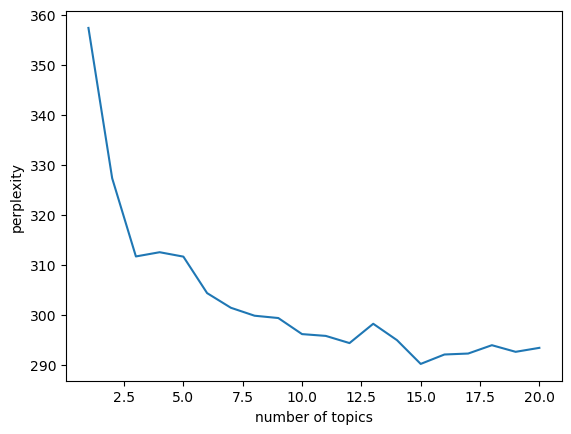

In [25]:
n_t=20#区间最右侧的值。注意：不能大于n_max_topics
x=list(range(1,n_t+1))
plt.plot(x,plexs[0:n_t])
plt.xlabel("number of topics")
plt.ylabel("perplexity")
plt.show()

In [19]:
import gensim
from gensim import corpora
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import warnings
warnings.filterwarnings('ignore')  # To ignore all warnings that arise here to enhance clarity
 
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel

NameError: name 'x' is not defined

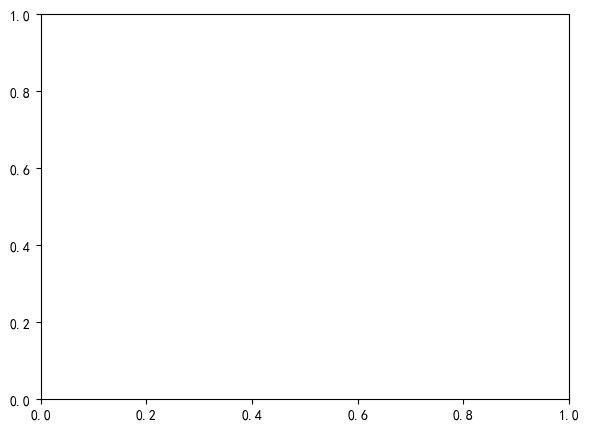

In [21]:
import matplotlib.pyplot as plt
import matplotlib
from pylab import xticks,yticks,np


# 调用准备函数
model_list, x, perplexity_values, coherence_values = lda_model_values(num_topics, corpus, dictionary) 

# 绘制困惑度和一致性折线图
fig = plt.figure(figsize=(15,5))
plt.rcParams['font.sans-serif']=['SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False 


ax1 = fig.add_subplot(1, 2, 1)
plt.plot(x, perplexity_values, marker="o")
plt.title("主题建模-困惑度")
plt.xlabel('主题数目')
plt.ylabel('困惑度大小')
xticks(np.linspace(1, num_topics, num_topics, endpoint=True)) # 保证x轴刻度为1



ax2 = fig.add_subplot(1, 2, 2)
plt.plot(x, coherence_values, marker="o")
plt.title("主题建模-一致性")
plt.xlabel("主题数目")
plt.ylabel("一致性大小")
xticks(np.linspace(1, num_topics, num_topics, endpoint=True))


plt.show()